In [1]:
# 1. CARGA DE LIBRERÍAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [20]:
# 2. CARGA DE DATOS
path_tsm = r'C:\Users\Lenovo\Desktop\MCD\2025-1\Estadistica\ae-oceanografia-golfo-cali\data\raw\Base de datos TSM consultoria estadística.xlsx'
path_chla = r'C:\Users\Lenovo\Desktop\MCD\2025-1\Estadistica\ae-oceanografia-golfo-cali\data\raw\Base de datos Chla consultoria estadística.xlsx'
path_coords = r'C:\Users\Lenovo\Desktop\MCD\2025-1\Estadistica\ae-oceanografia-golfo-cali\data\raw\Coordenadas zona costera occidental GC.csv'
path_oni = r'C:\Users\Lenovo\Desktop\MCD\2025-1\Estadistica\ae-oceanografia-golfo-cali\data\raw\oni-Cold & Warm Episodes by Season.csv - Sheet1.csv'

tsm_df = pd.read_excel(path_tsm)
chla_df = pd.read_excel(path_chla)
coords_df = pd.read_csv(path_coords, header=None)
oni_df = pd.read_csv(path_oni)


In [22]:
def clean_column_names(df):
    return df.rename(columns={col: col.strip().replace("°", "").replace(" ", "") for col in df.columns})

chl_a_df_clean = clean_column_names(chla_df)
tsm_df_clean = clean_column_names(tsm_df)


In [23]:
chla_df

,ORDEN,FECHA,AÑO,MES,ESTACIÓN DEL AÑO,EVENTO INTERANUAL,Est 1°,Est 2°,Est 3°,Est 4°,...,Est 8°,Est 9°,Est 10°,Est 11°,Est 12°,Est 13°,Est 14°,Est 15°,Est 16°,Est 17°
0,1,1997-09-01,1997,Septiembre,Otoño,Niño,0.1351,0.1281,0.1808,0.2266,...,0.5426,0.7643,1.0835,1.0230,1.2773,1.4592,0.6393,0.7153,0.9540,0.8567
1,2,1997-10-01,1997,Octubre,Otoño,Niño,0.1281,0.1580,0.2165,0.2528,...,0.4720,0.4914,0.6826,0.8687,1.6470,1.3498,1.0666,0.9594,1.7220,2.1849
2,3,1997-11-01,1997,Noviembre,Otoño,Niño,0.2229,0.2907,0.3404,0.3641,...,0.7847,1.2401,1.2862,1.5959,1.9907,1.4808,1.2608,2.0418,1.3360,1.4306
3,4,1997-12-01,1997,Diciembre,Invierno,Niño,0.4121,0.3930,0.6597,0.7563,...,0.5972,0.6240,0.7224,0.7215,0.7974,0.8068,0.9105,1.5298,1.2723,1.3488
4,5,1998-01-01,1998,Enero,Invierno,Niño,0.4254,0.5376,0.7848,0.6495,...,1.0542,1.1530,0.9157,0.7955,1.4840,1.0542,0.8114,0.8770,1.1915,3.3765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,250,2018-06-01,2018,Junio,Verano,Normal,0.3699,0.2879,0.3762,0.6841,...,0.4791,0.7012,1.1080,1.7313,3.6363,5.9961,2.1517,1.0134,1.0179,0.7906
250,251,2018-07-01,2018,Julio,Verano,Normal,0.2008,0.2455,0.2345,0.2604,...,0.2500,0.3176,0.3670,0.8650,0.8830,0.8850,0.5338,0.4553,0.5652,0.5574
251,252,2018-08-01,2018,Agosto,Verano,Normal,0.1518,0.1640,0.1766,0.2009,...,0.2427,0.7337,0.6714,0.9780,1.1155,1.2829,0.5233,0.4427,0.5018,0.9043
252,253,2018-09-01,2018,Septiembre,Otoño,Niño,0.1364,0.1673,0.1801,0.2151,...,0.3176,0.6210,0.9820,0.9788,1.8152,1.2695,0.9407,0.4540,0.8688,1.4022


In [25]:
# Renombrar columnas correctamente como 'lon' y 'lat'
coords_df_clean = coords_df.rename(columns={coords_df.columns[0]: 'lon', coords_df.columns[2]: 'lat'})

# Agregar nombres de estación para referencia
coords_df_clean["estacion"] = [f"Est{i+1}" for i in range(len(coords_df_clean))]

# Reordenar columnas para claridad
coords_df_clean = coords_df_clean[["estacion", "lon", "lat"]]

coords_df_clean

,estacion,lon,lat
0,Est1,-109.3,23.8
1,Est2,-109.7,24.2
2,Est3,-110.1,24.6
3,Est4,-110.5,24.8
4,Est5,-110.8,25.3
5,Est6,-111.1,25.8
6,Est7,-111.2,26.3
7,Est8,-111.5,26.8
8,Est9,-111.9,27.2
9,Est10,-112.3,27.6


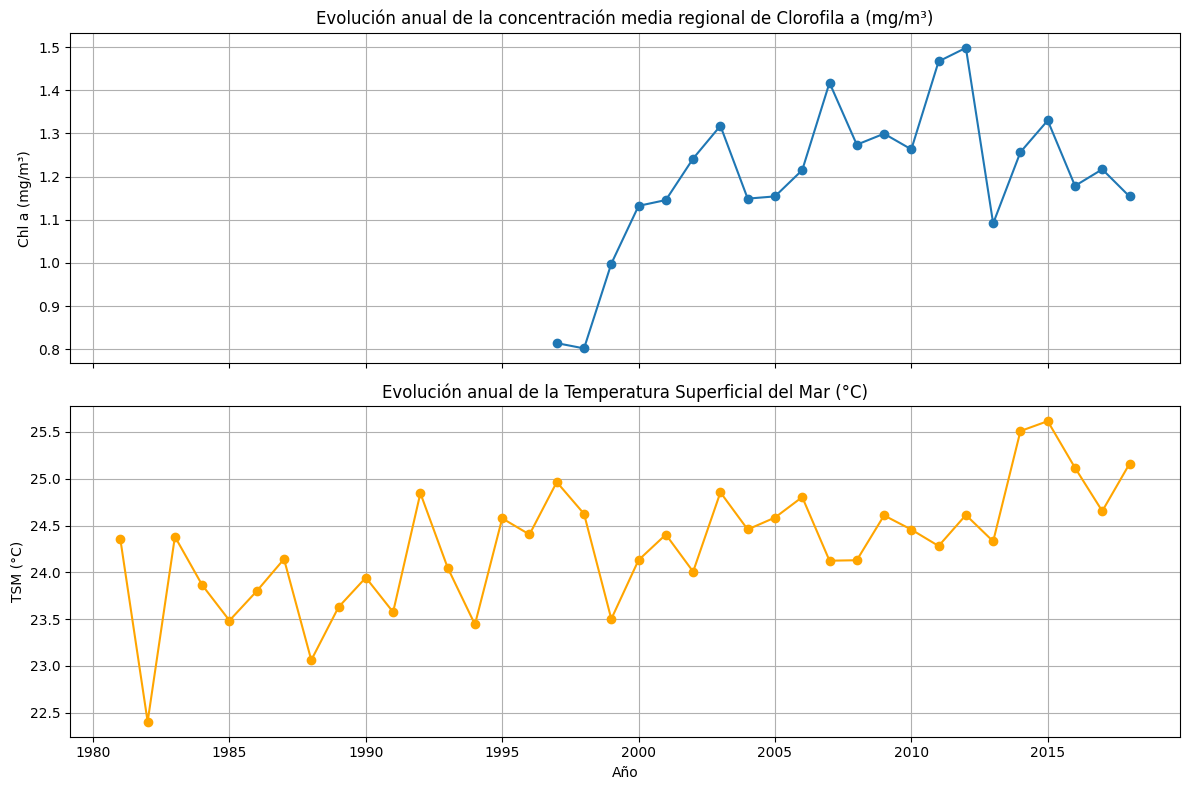

In [26]:
# Convertir la columna FECHA a formato datetime en ambos datasets
chl_a_df_clean["FECHA"] = pd.to_datetime(chl_a_df_clean["FECHA"])
tsm_df_clean["FECHA"] = pd.to_datetime(tsm_df_clean["FECHA"])

# Crear un resumen anual (media por año) para cada estación en Chl a
chl_a_annual = chl_a_df_clean.groupby("AÑO")[[f"Est{i}" for i in range(1, 18)]].mean()
tsm_annual = tsm_df_clean.groupby("AÑO")[[f"Est{i}" for i in range(1, 18)]].mean()

# Calcular la media general anual para toda la región (promedio entre estaciones)
chl_a_annual["MediaRegional"] = chl_a_annual.mean(axis=1)
tsm_annual["MediaRegional"] = tsm_annual.mean(axis=1)

# Graficar evolución temporal de la media regional anual de Chl a y TSM
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Clorofila a
axes[0].plot(chl_a_annual.index, chl_a_annual["MediaRegional"], marker='o')
axes[0].set_title("Evolución anual de la concentración media regional de Clorofila a (mg/m³)")
axes[0].set_ylabel("Chl a (mg/m³)")
axes[0].grid(True)

# TSM
axes[1].plot(tsm_annual.index, tsm_annual["MediaRegional"], color='orange', marker='o')
axes[1].set_title("Evolución anual de la Temperatura Superficial del Mar (°C)")
axes[1].set_ylabel("TSM (°C)")
axes[1].set_xlabel("Año")
axes[1].grid(True)

plt.tight_layout()
plt.show()


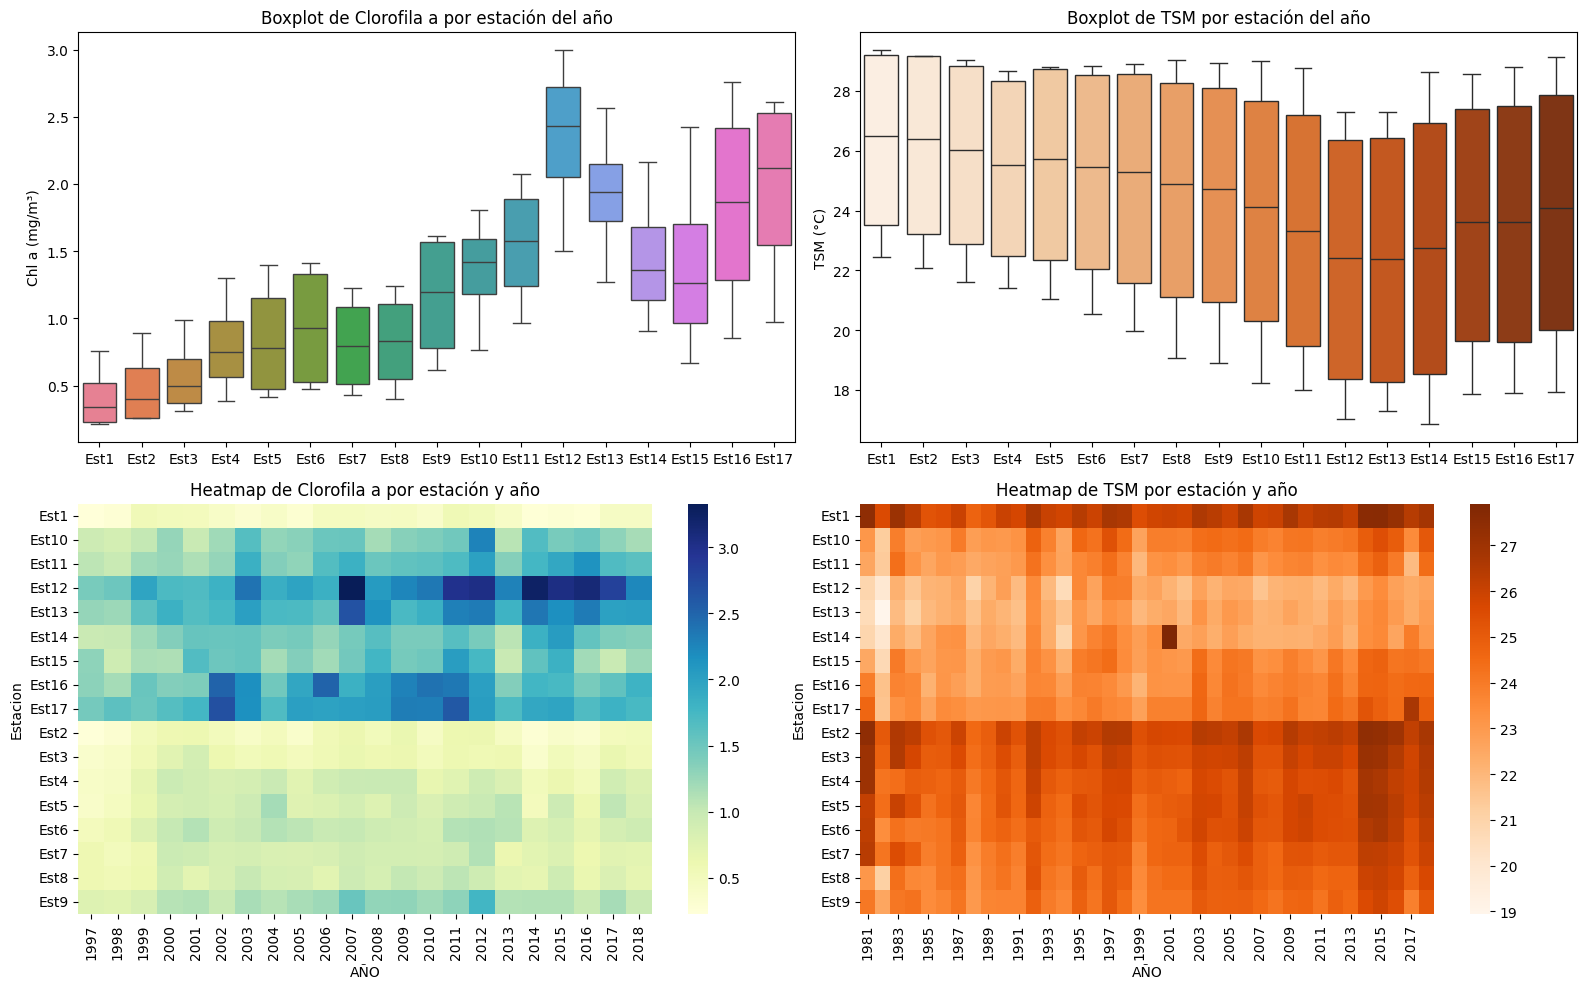

In [27]:
# Agregar columna de año a los DataFrames limpios
chl_a_df_clean["AÑO"] = chl_a_df_clean["FECHA"].dt.year
tsm_df_clean["AÑO"] = tsm_df_clean["FECHA"].dt.year

# Agregar columna de estación del año (estandarizar)
chl_a_df_clean["ESTACION"] = chl_a_df_clean["ESTACIÓNDELAÑO"].str.capitalize()
tsm_df_clean["ESTACION"] = tsm_df_clean["ESTACIÓNDELAÑO"].str.capitalize()

# Paso 1: Boxplots estacionales para Chl a y TSM
chl_seasonal = chl_a_df_clean.groupby("ESTACION")[[f"Est{i}" for i in range(1, 18)]].mean().T
tsm_seasonal = tsm_df_clean.groupby("ESTACION")[[f"Est{i}" for i in range(1, 18)]].mean().T

# Paso 2: Transformación long-format para heatmaps
chl_a_long = chl_a_df_clean.melt(id_vars=["FECHA", "AÑO"], value_vars=[f"Est{i}" for i in range(1, 18)], 
                                  var_name="Estacion", value_name="Chla")
tsm_long = tsm_df_clean.melt(id_vars=["FECHA", "AÑO"], value_vars=[f"Est{i}" for i in range(1, 18)], 
                             var_name="Estacion", value_name="TSM")

# Crear mapas de calor (heatmaps) para Chl a y TSM
chl_heatmap = chl_a_long.pivot_table(index="Estacion", columns="AÑO", values="Chla")
tsm_heatmap = tsm_long.pivot_table(index="Estacion", columns="AÑO", values="TSM")

# Visualización
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Boxplots estacionales
sns.boxplot(data=chl_seasonal.T, ax=axes[0, 0])
axes[0, 0].set_title("Boxplot de Clorofila a por estación del año")
axes[0, 0].set_ylabel("Chl a (mg/m³)")

sns.boxplot(data=tsm_seasonal.T, ax=axes[0, 1], palette="Oranges")
axes[0, 1].set_title("Boxplot de TSM por estación del año")
axes[0, 1].set_ylabel("TSM (°C)")

# Heatmaps
sns.heatmap(chl_heatmap, cmap="YlGnBu", ax=axes[1, 0])
axes[1, 0].set_title("Heatmap de Clorofila a por estación y año")

sns.heatmap(tsm_heatmap, cmap="Oranges", ax=axes[1, 1])
axes[1, 1].set_title("Heatmap de TSM por estación y año")

plt.tight_layout()
plt.show()


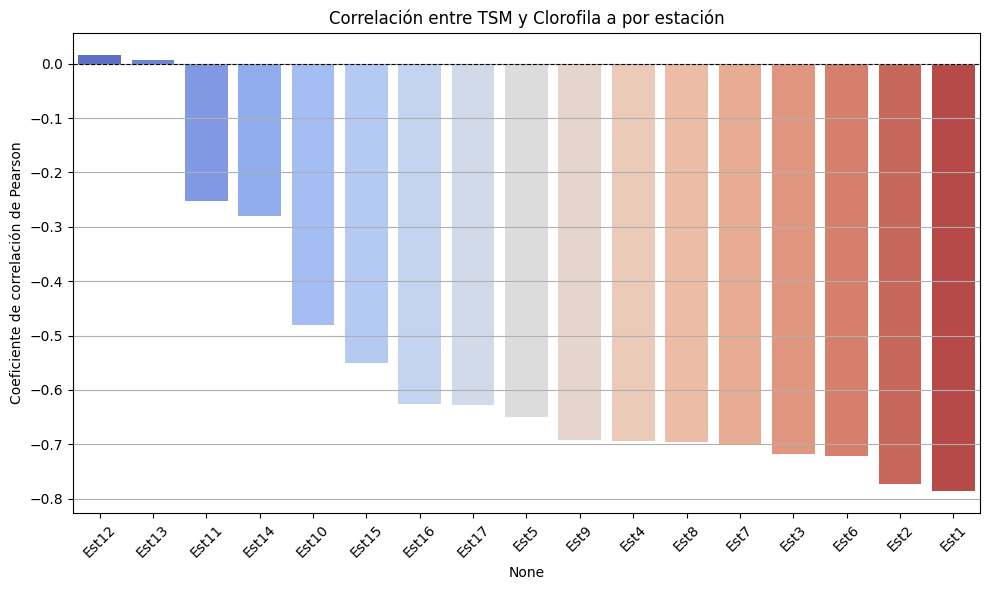

In [28]:
# Combinar ambos dataframes a nivel mensual para analizar correlación por estación
merged_df = pd.merge(
    chl_a_df_clean[["FECHA"] + [f"Est{i}" for i in range(1, 18)]],
    tsm_df_clean[["FECHA"] + [f"Est{i}" for i in range(1, 18)]],
    on="FECHA",
    suffixes=("_chl", "_tsm")
)

# Calcular la correlación por estación (Est1, Est2, ..., Est17)
correlations = {}
for i in range(1, 18):
    col_chl = f"Est{i}_chl"
    col_tsm = f"Est{i}_tsm"
    corr = merged_df[[col_chl, col_tsm]].corr().iloc[0, 1]
    correlations[f"Est{i}"] = corr

# Convertir a DataFrame para visualización
corr_df = pd.DataFrame.from_dict(correlations, orient="index", columns=["Correlación TSM - Chl a"])
corr_df = corr_df.sort_values(by="Correlación TSM - Chl a", ascending=False)

# Visualizar
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_df.index, y="Correlación TSM - Chl a", data=corr_df, palette="coolwarm")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("Correlación entre TSM y Clorofila a por estación")
plt.ylabel("Coeficiente de correlación de Pearson")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [ ]:
from scipy.fft import fft, fftfreq

# Corrección de la función extract_fft_features para usar arrays puros de numpy
def extract_fft_features(df, variable_prefix, sampling_rate=1):
    fft_results = {}
    estaciones = [f"{variable_prefix}{i}" for i in range(1, 18)]
    
    for est in estaciones:
        series = df[est].dropna().values.astype(float)
        N = len(series)
        if N < 2:
            fft_results[est] = {"frecuencia_dominante": np.nan, "amplitud": np.nan}
            continue
        
        yf = fft(series - np.mean(series))  # Remover media
        xf = fftfreq(N, d=sampling_rate)[:N//2]  # Frecuencias positivas

        amplitudes = 2.0/N * np.abs(yf[0:N//2])
        dominant_freq_idx = np.argmax(amplitudes[1:]) + 1  # Excluir la frecuencia 0
        fft_results[est] = {
            "frecuencia_dominante": xf[dominant_freq_idx],
            "amplitud": amplitudes[dominant_freq_idx]
        }

    return pd.DataFrame(fft_results).T

# Reaplicar FFT con corrección
chl_fft = extract_fft_features(chl_a_df_clean, "Est")
tsm_fft = extract_fft_features(tsm_df_clean, "Est")

chl_fft["variable"] = "Chl a"
tsm_fft["variable"] = "TSM"
fft_summary = pd.concat([chl_fft, tsm_fft], keys=["Chl a", "TSM"])


In [30]:
fft_summary

frecuencia_dominante  amplitud variable
Chl a Est1               0.082677  0.289860    Chl a
      Est2               0.082677  0.353660    Chl a
      Est3               0.082677  0.337766    Chl a
      Est4               0.082677  0.430955    Chl a
      Est5               0.082677  0.562762    Chl a
      Est6               0.082677  0.617397    Chl a
      Est7               0.082677  0.504676    Chl a
      Est8               0.082677  0.530002    Chl a
      Est9               0.082677  0.637619    Chl a
      Est10              0.082677  0.471475    Chl a
      Est11              0.165354  0.589652    Chl a
      Est12              0.165354  0.882336    Chl a
      Est13              0.165354  0.606775    Chl a
      Est14              0.165354  0.522669    Chl a
      Est15              0.082677  0.828606    Chl a
      Est16              0.082677  1.055222    Chl a
      Est17              0.082677  0.929062    Chl a
TSM   Est1               0.082960  4.485910      TSM
      Est2               0.082960  4.613950      TSM
      Est3               0.082960  4.705419      TSM
      Est4               0.082960  4.652154      TSM
      Est5               0.082960  5.005109      TSM
      Est6               0.082960  5.243717      TSM
      Est7               0.082960  5.614566      TSM
      Est8               0.082960  6.010251      TSM
      Est9               0.082960  6.000130      TSM
      Est10              0.082960  6.313327      TSM
      Est11              0.082960  6.492298      TSM
      Est12              0.082960  6.545320      TSM
      Est13              0.082960  6.451518      TSM
      Est14              0.082960  7.347836      TSM
      Est15              0.082960  6.571799      TSM
      Est16              0.082960  6.616384      TSM
      Est17              0.082960  6.762513      TSM

In [31]:
import folium
from folium import plugins

# Unimos las coordenadas con las amplitudes o frecuencias de la FFT
map_data = coords_df_clean.copy()
map_data["amplitud_chla"] = chl_fft["amplitud"].values
map_data["amplitud_tsm"] = tsm_fft["amplitud"].values

# Crear mapa centrado en el Golfo de California
m = folium.Map(location=[26.0, -110.5], zoom_start=6, tiles="CartoDB positron")

# Añadir estaciones con información de amplitud de Chl a y TSM
for i, row in map_data.iterrows():
    popup_text = (
        f"<b>{row['estacion']}</b><br>"
        f"Lat: {row['lat']}, Lon: {row['lon']}<br>"
        f"Amplitud Chl a: {row['amplitud_chla']:.2f}<br>"
        f"Amplitud TSM: {row['amplitud_tsm']:.2f}"
    )
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=7,
        color="blue",
        fill=True,
        fill_color="cyan",
        fill_opacity=0.7,
        popup=folium.Popup(popup_text, max_width=250),
        tooltip=row['estacion']
    ).add_to(m)

# Mostrar mapa
m


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Usamos promedios anuales por estación para construir el dataset para clustering
chl_annual_station = chl_a_df_clean.groupby("AÑO")[[f"Est{i}" for i in range(1, 18)]].mean().T
tsm_annual_station = tsm_df_clean.groupby("AÑO")[[f"Est{i}" for i in range(1, 18)]].mean().T

# Unimos ambas variables: cada fila será una estación, columnas son valores anuales concatenados
features = pd.concat([chl_annual_station, tsm_annual_station], axis=1)
features.columns = [f"y{year}" for year in range(1997, 2019)] + [f"tsm_y{year}" for year in range(1981, 2019)]

# Escalamos los datos para clustering
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features.fillna(0))  # Rellenamos NaNs con 0 para análisis

# Aplicar KMeans con 3 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(features_scaled)

# Aplicar clustering jerárquico (agglomerative)
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo_labels = agglo.fit_predict(features_scaled)

# Agregar resultados al DataFrame de coordenadas
coords_df_clean["Cluster_KMeans"] = kmeans_labels
coords_df_clean["Cluster_Jerarquico"] = agglo_labels

coords_df_clean

,estacion,lon,lat,Cluster_KMeans,Cluster_Jerarquico
0,Est1,-109.3,23.8,2,0
1,Est2,-109.7,24.2,2,0
2,Est3,-110.1,24.6,2,0
3,Est4,-110.5,24.8,0,0
4,Est5,-110.8,25.3,0,0
5,Est6,-111.1,25.8,0,0
6,Est7,-111.2,26.3,0,0
7,Est8,-111.5,26.8,0,0
8,Est9,-111.9,27.2,0,1
9,Est10,-112.3,27.6,3,1


In [39]:
# Crear mapa centrado en el Golfo de California
m_clusters = folium.Map(location=[26.0, -110.5], zoom_start=6, tiles="CartoDB positron")

# Colores distintos para cada cluster
cluster_colors = {0: "red", 1: "blue", 2: "green", 3: "yellow"}

# Agregar estaciones con color por cluster (KMeans)
for _, row in coords_df_clean.iterrows():
    popup_text = (
        f"<b>{row['estacion']}</b><br>"
        f"Cluster KMeans: {row['Cluster_KMeans']}<br>"
        f"Cluster Jerárquico: {row['Cluster_Jerarquico']}"
    )
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=7,
        color=cluster_colors[row["Cluster_KMeans"]],
        fill=True,
        fill_color=cluster_colors[row["Cluster_KMeans"]],
        fill_opacity=0.75,
        popup=folium.Popup(popup_text, max_width=250),
        tooltip=row["estacion"]
    ).add_to(m_clusters)

m_clusters


In [41]:
chla_df

,ORDEN,FECHA,AÑO,MES,ESTACIÓN DEL AÑO,EVENTO INTERANUAL,Est 1°,Est 2°,Est 3°,Est 4°,...,Est 8°,Est 9°,Est 10°,Est 11°,Est 12°,Est 13°,Est 14°,Est 15°,Est 16°,Est 17°
0,1,1997-09-01,1997,Septiembre,Otoño,Niño,0.1351,0.1281,0.1808,0.2266,...,0.5426,0.7643,1.0835,1.0230,1.2773,1.4592,0.6393,0.7153,0.9540,0.8567
1,2,1997-10-01,1997,Octubre,Otoño,Niño,0.1281,0.1580,0.2165,0.2528,...,0.4720,0.4914,0.6826,0.8687,1.6470,1.3498,1.0666,0.9594,1.7220,2.1849
2,3,1997-11-01,1997,Noviembre,Otoño,Niño,0.2229,0.2907,0.3404,0.3641,...,0.7847,1.2401,1.2862,1.5959,1.9907,1.4808,1.2608,2.0418,1.3360,1.4306
3,4,1997-12-01,1997,Diciembre,Invierno,Niño,0.4121,0.3930,0.6597,0.7563,...,0.5972,0.6240,0.7224,0.7215,0.7974,0.8068,0.9105,1.5298,1.2723,1.3488
4,5,1998-01-01,1998,Enero,Invierno,Niño,0.4254,0.5376,0.7848,0.6495,...,1.0542,1.1530,0.9157,0.7955,1.4840,1.0542,0.8114,0.8770,1.1915,3.3765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,250,2018-06-01,2018,Junio,Verano,Normal,0.3699,0.2879,0.3762,0.6841,...,0.4791,0.7012,1.1080,1.7313,3.6363,5.9961,2.1517,1.0134,1.0179,0.7906
250,251,2018-07-01,2018,Julio,Verano,Normal,0.2008,0.2455,0.2345,0.2604,...,0.2500,0.3176,0.3670,0.8650,0.8830,0.8850,0.5338,0.4553,0.5652,0.5574
251,252,2018-08-01,2018,Agosto,Verano,Normal,0.1518,0.1640,0.1766,0.2009,...,0.2427,0.7337,0.6714,0.9780,1.1155,1.2829,0.5233,0.4427,0.5018,0.9043
252,253,2018-09-01,2018,Septiembre,Otoño,Niño,0.1364,0.1673,0.1801,0.2151,...,0.3176,0.6210,0.9820,0.9788,1.8152,1.2695,0.9407,0.4540,0.8688,1.4022


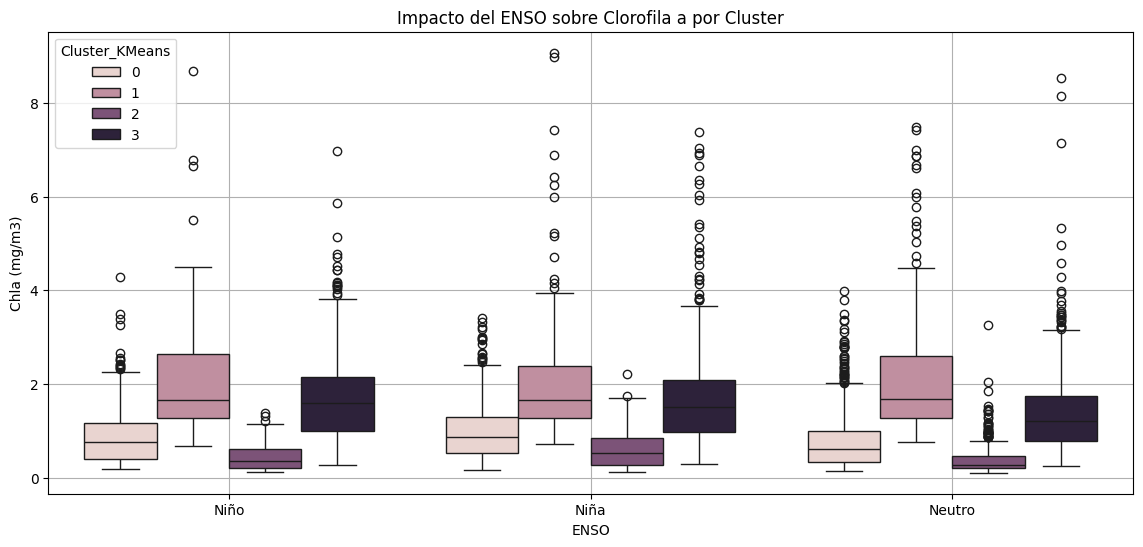

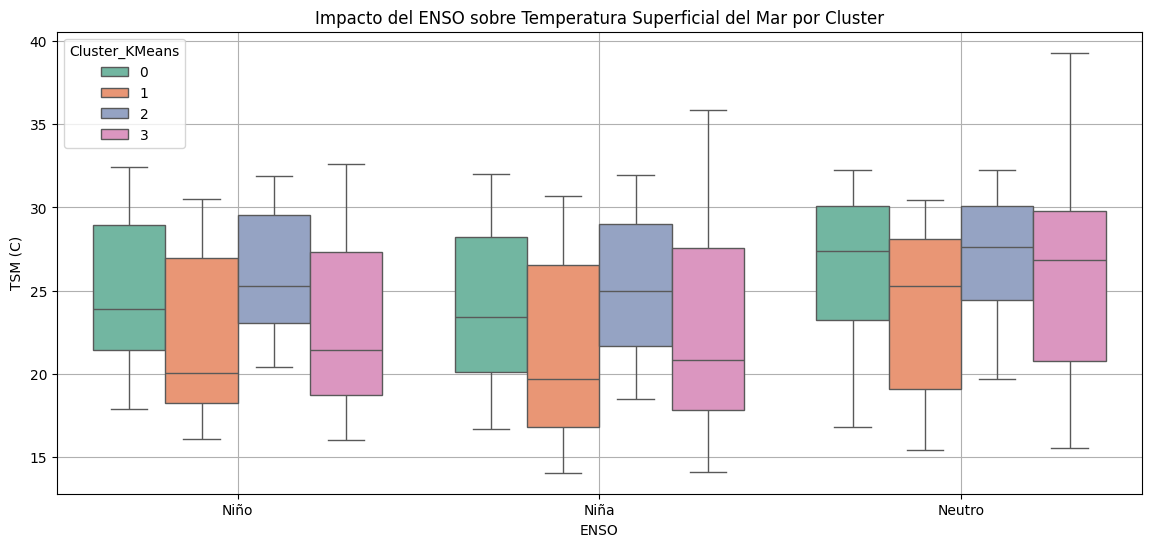

In [44]:
# 10. Preparar ENSO
oni_df = oni_df[oni_df["Year"] != "Year"]
oni_df_melted = oni_df.melt(id_vars=["Year"], var_name="Season", value_name="ONI")
oni_df_melted["ONI"] = pd.to_numeric(oni_df_melted["ONI"], errors="coerce")
oni_df_melted["Year"] = oni_df_melted["Year"].astype(int)
oni_df_melted["ENSO"] = oni_df_melted["ONI"].apply(lambda x: "Niña" if x <= -0.5 else "Niño" if x >= 0.5 else "Neutro")

# 11. Dataset largo y merge ENSO
chl_long = chl_a_df_clean.melt(id_vars=["FECHA", "AÑO"], value_vars=[f"Est{i}" for i in range(1, 18)], var_name="estacion", value_name="Chla")
tsm_long = tsm_df_clean.melt(id_vars=["FECHA", "AÑO"], value_vars=[f"Est{i}" for i in range(1, 18)], var_name="estacion", value_name="TSM")
data_long = pd.merge(chl_long, tsm_long, on=["FECHA", "AÑO", "estacion"])
data_long = pd.merge(data_long, coords_df_clean[["estacion", "Cluster_KMeans"]], on="estacion")
data_long["Year"] = data_long["AÑO"].astype(int)

# Asignar temporada móvil

def get_season_movil(date):
    m = date.month
    return ("DJF" if m in [12,1,2] else "JFM" if m in [1,2,3] else "FMA" if m in [2,3,4]
            else "MAM" if m in [3,4,5] else "AMJ" if m in [4,5,6] else "MJJ" if m in [5,6,7]
            else "JJA" if m in [6,7,8] else "JAS" if m in [7,8,9] else "ASO" if m in [8,9,10]
            else "SON" if m in [9,10,11] else "OND")
data_long["Season"] = data_long["FECHA"].apply(get_season_movil)
merged_enso = pd.merge(data_long, oni_df_melted[["Year", "Season", "ENSO"]], on=["Year", "Season"], how="left")

# 12. Visualización del impacto del ENSO por cluster
plt.figure(figsize=(14, 6))
sns.boxplot(data=merged_enso, x="ENSO", y="Chla", hue="Cluster_KMeans")
plt.title("Impacto del ENSO sobre Clorofila a por Cluster")
plt.ylabel("Chla (mg/m3)")
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(data=merged_enso, x="ENSO", y="TSM", hue="Cluster_KMeans", palette="Set2")
plt.title("Impacto del ENSO sobre Temperatura Superficial del Mar por Cluster")
plt.ylabel("TSM (C)")
plt.grid(True)
plt.show()
